## Customer-Churn Project

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [161]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

In [127]:
df = pd.read_csv('customer_churn_data.csv')

In [128]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [129]:
# Checking for missinng values
df.isnull().mean()*100 # Percentage of missing values in each column

CustomerID          0.0
Age                 0.0
Gender              0.0
Tenure              0.0
MonthlyCharges      0.0
ContractType        0.0
InternetService    29.7
TotalCharges        0.0
TechSupport         0.0
Churn               0.0
dtype: float64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [131]:
# Filling InternetService with ""
df['InternetService'] = df['InternetService'].fillna("")

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [133]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [134]:
# Checking for duplicated rows
df.duplicated().sum()

np.int64(0)

In [135]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [174]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

In [175]:
numeric_features = x.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = x.select_dtypes(include=["object"]).columns.tolist()

In [163]:
categorical_features.head()

,Gender,ContractType,InternetService,TechSupport,Churn
0,Male,Month-to-Month,Fiber Optic,Yes,Yes
1,Male,Month-to-Month,Fiber Optic,Yes,Yes
2,Female,Month-to-Month,Fiber Optic,No,Yes
3,Female,One-Year,DSL,Yes,Yes
4,Male,Month-to-Month,,No,Yes


In [179]:
numeric_features

['CustomerID', 'Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']

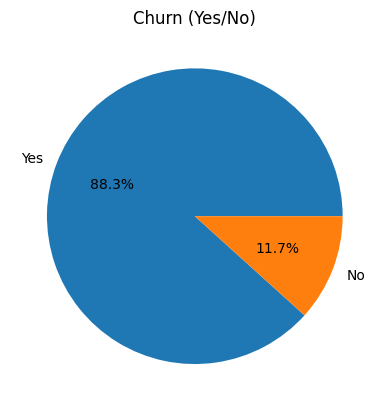

In [180]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Churn (Yes/No)')
plt.ylabel('')
plt.show()

In [139]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [140]:
df.groupby('Churn')["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [141]:
df.groupby(['Churn', 'Gender'])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [142]:
df.groupby('Churn')["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [143]:
df.groupby('Churn')["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

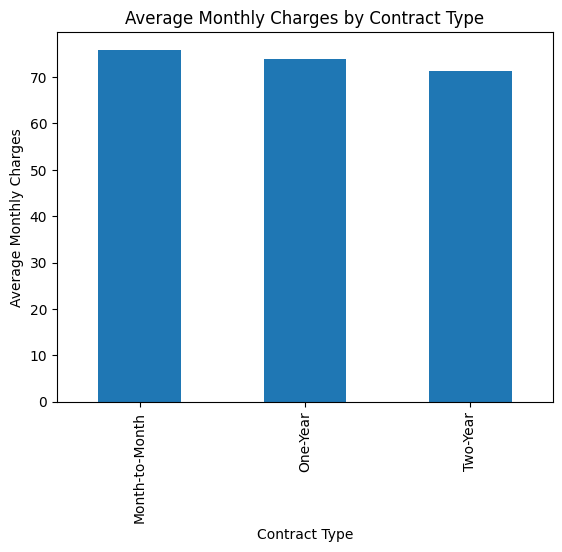

In [144]:
df.groupby('ContractType')["MonthlyCharges"].mean().plot(kind='bar')
plt.title('Average Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Average Monthly Charges')
plt.show()

At the lower term we can see that the monthly charge average decreases

In [145]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


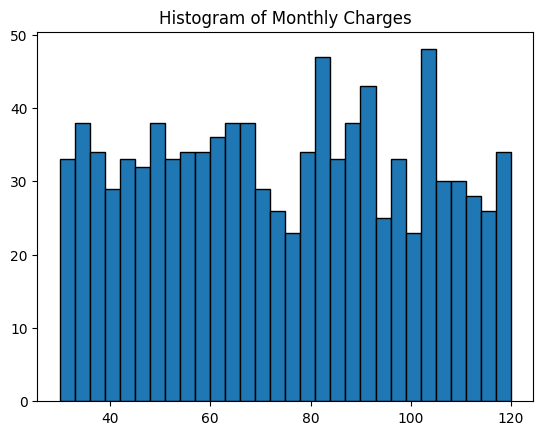

In [146]:
plt.hist(df['MonthlyCharges'], bins=30, edgecolor='black')
plt.title('Histogram of Monthly Charges')
plt.show()

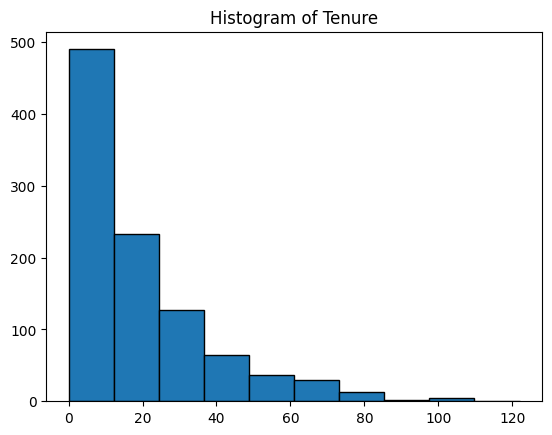

In [147]:
plt.hist(df['Tenure'], edgecolor='black')
plt.title('Histogram of Tenure')
plt.show()

## Feature Engineering

In [148]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [165]:
x.shape, y.shape

((1000, 9), (1000,))

In [168]:
x.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No


In [158]:
# Encoding the target variable
y['Churn'] = y['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

C:\Users\Rafy Mustafa\AppData\Local\Temp\ipykernel_1164\1171702765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn'] = y['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [160]:
type(y["Churn"][0])

numpy.int64

In [181]:
# Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


In [170]:
# Defining the model
logreg = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

rf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", RandomForestClassifier())
])

In [171]:
# GridSearchCV Setup
param_grid_logreg = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__solver": ["liblinear"]
}

param_grid_rf = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [5, 10, None],
    "classifier__min_samples_split": [2, 5]
}

In [172]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [182]:
# Tuning & Training the Model
print("\n🔍 Tuning Logistic Regression...")
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring="accuracy", n_jobs=-1)
grid_logreg.fit(x_train, y_train)

print("\n🔍 Tuning Random Forest...")
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf.fit(x_train, y_train)


🔍 Tuning Logistic Regression...


ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "f:\Developershub-Corporation\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "f:\Developershub-Corporation\.venv\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "f:\Developershub-Corporation\.venv\Lib\site-packages\sklearn\pipeline.py", line 653, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "f:\Developershub-Corporation\.venv\Lib\site-packages\sklearn\pipeline.py", line 587, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ~~~~~~~~~~~~~~~~~~~~~~~~^
        cloned_transformer,
        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
        params=step_params,
        ^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "f:\Developershub-Corporation\.venv\Lib\site-packages\joblib\memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "f:\Developershub-Corporation\.venv\Lib\site-packages\sklearn\pipeline.py", line 1539, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "f:\Developershub-Corporation\.venv\Lib\site-packages\sklearn\utils\_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "f:\Developershub-Corporation\.venv\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "f:\Developershub-Corporation\.venv\Lib\site-packages\sklearn\compose\_column_transformer.py", line 988, in fit_transform
    self._validate_column_callables(X)
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "f:\Developershub-Corporation\.venv\Lib\site-packages\sklearn\compose\_column_transformer.py", line 541, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
  File "f:\Developershub-Corporation\.venv\Lib\site-packages\sklearn\utils\_indexing.py", line 396, in _get_column_indices
    key_dtype = _determine_key_type(key)
  File "f:\Developershub-Corporation\.venv\Lib\site-packages\sklearn\utils\_indexing.py", line 227, in _determine_key_type
    raise ValueError(err_msg)
ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed
